In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
import cv2
import pywt

(360, 260, 3)


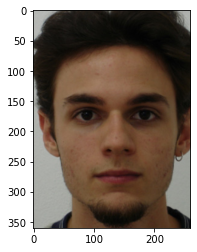

In [45]:
img = cv2.imread('emotion/neutral/80a.jpg')
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(360, 260)


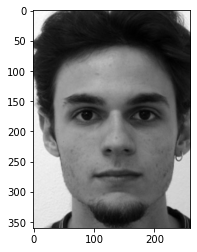

In [46]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')
plt.show()

In [47]:
face_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

In [48]:
faces = face_cascade.detectMultiScale(gray, 1.3, 3)
faces

array([[ 13,  74, 239, 239]], dtype=int32)

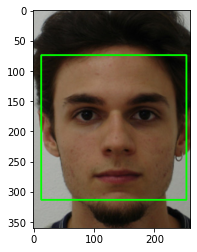

In [49]:
for (x, y, w, h) in [faces[0]]:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))

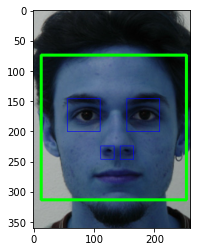

In [50]:
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 1)
    
plt.imshow(face_img)
plt.show()

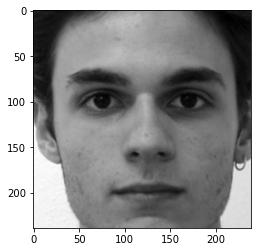

In [51]:
plt.imshow(roi_gray, cmap='gray')
plt.show()

In [10]:
cropped_img = np.array(roi_color)
cropped_img.shape

(1894, 1894, 3)

In [11]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 3)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        return roi_color

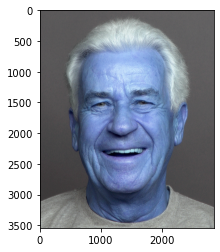

In [12]:
original_image = cv2.imread('emotion/happy/004_o_m_h_a.jpg')
plt.imshow(original_image)
plt.show()

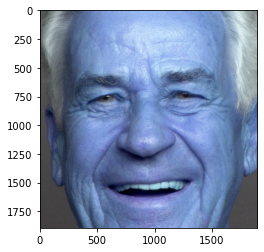

In [13]:
cropped_image = get_cropped_image('emotion/happy/004_o_m_h_a.jpg')
plt.imshow(cropped_image)
plt.show()

In [14]:
path_to_data = 'emotion/'
path_to_cr_data = 'dataset-cropped_image 5/'

In [15]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [16]:
img_dirs

['emotion/angry',
 'emotion/fear',
 'emotion/neutral',
 'emotion/surprise',
 'emotion/happy',
 'emotion/sad',
 'emotion/disgust']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [18]:
cropped_image_dirs = []
emotion_names_dict = {}
for img_dir in img_dirs:
    count = 1
    emotion_name = img_dir.split('/')[-1]
    emotion_names_dict[emotion_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + emotion_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = emotion_name + '5sc' + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            emotion_names_dict[emotion_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  dataset-cropped_image 5/angry
Generating cropped images in folder:  dataset-cropped_image 5/fear
Generating cropped images in folder:  dataset-cropped_image 5/neutral
Generating cropped images in folder:  dataset-cropped_image 5/surprise
Generating cropped images in folder:  dataset-cropped_image 5/happy
Generating cropped images in folder:  dataset-cropped_image 5/sad
Generating cropped images in folder:  dataset-cropped_image 5/disgust


In [19]:
class_dict = {}
count = 0
for emotion_name in emotion_names_dict.keys():
    class_dict[emotion_name] = count
    count = count + 1
class_dict

{'angry': 0,
 'fear': 1,
 'neutral': 2,
 'surprise': 3,
 'happy': 4,
 'sad': 5,
 'disgust': 6}